### What is Cohort?
Cohort means "a group of people with a shared characteristic".

### What is Cohort Analysis?
Cohort analysis is a subset of behavioral analytics that takes the data from a given data set (e.g. an EMRS, an e-commerce platform, web application, or online game) and rather than looking at all users as one unit, it breaks them into related groups for analysis.

### Types of cohorts:

1. Time Cohorts - Customers who signed up for a product during a particular time frame. 
( Analyzing these cohorts shows the customer's behavior depending on the time they started using the company’s products.) 
( The time may be monthly or quarterly even daily. )
2. Behaovior cohorts - customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
3. Size cohorts - refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

### Dataset Description

1. Invoice - Invoice Number
2. StockCode - Code of the Stock
3. Description - Stock Name
4. Quantity - Number of quantities
5. InvoiceDate - Date Of Purchase
6. Price - Price of the stock
7. Customer ID - ID of the Customer
8. Country - Name of the Country

### Problem

1. To Do Cohort Analysis.
2. Visualize Customer Retention %. 

### Importing Libraries and Dataset


In [33]:
#importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)


In [34]:
#importing Data
data=pd.read_csv('../input/online-retail-ii-uci/online_retail_II.csv',parse_dates=['InvoiceDate'])

In [35]:
#Dataset Shape
data.shape

(1067371, 8)

### Cleaning Dataset

In [36]:
# Checking for Null Values
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [37]:
# Dropping Null Values in Customer ID Column
data=data.dropna(subset=['Customer ID'])

In [38]:
# Checking for Duplicates
data.duplicated().sum()

26479

In [39]:
# Dropping duplicates
data=data.drop_duplicates()

### Cohort Analysis

Time Period - Month

In [40]:
data['InvoiceMonth']=data['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,1))

grouping= data.groupby('Customer ID')['InvoiceMonth']
data['CohortMonth']=grouping.transform('min')
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01


In [41]:
def cohort_index(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

inv_year,inv_month,inv_day=cohort_index(data,'InvoiceMonth')
coh_year,coh_month,coh_day=cohort_index(data,'CohortMonth')

data['CohortIndex']=((inv_year-coh_year)*12)+(inv_month-coh_month)+1

In [42]:
grouping=data.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,Customer ID
0,2009-12-01,1,1045
1,2009-12-01,2,392
2,2009-12-01,3,358
3,2009-12-01,4,447
4,2009-12-01,5,410
5,2009-12-01,6,408
6,2009-12-01,7,408
7,2009-12-01,8,374
8,2009-12-01,9,355
9,2009-12-01,10,392


In [43]:
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Customer ID')

In [44]:
cohort_data=cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_data,axis=0)
retention.index=retention.index.date
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
2009-12-01,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,0.432536,0.495694,0.370335,0.291866,0.255502,0.305263,0.261244,0.302392,0.289952,0.274641,0.262201,0.317703,0.305263,0.408612,0.208612
2010-01-01,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,0.309645,0.164975,0.205584,0.167513,0.180203,0.152284,0.218274,0.187817,0.175127,0.185279,0.236041,0.185279,0.223350,0.073604,NaN
2010-02-01,1.0,0.300275,0.225895,0.303030,0.256198,0.209366,0.217631,0.283747,0.275482,0.292011,0.132231,0.129477,0.151515,0.192837,0.134986,0.203857,0.184573,0.168044,0.146006,0.234160,0.247934,0.170799,0.063361,NaN,NaN
2010-03-01,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.114679,0.114679,0.142202,0.192661,0.165138,0.190367,0.169725,0.174312,0.158257,0.169725,0.204128,0.213303,0.075688,NaN,NaN,NaN
2010-04-01,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.113402,0.116838,0.082474,0.144330,0.137457,0.161512,0.158076,0.147766,0.140893,0.140893,0.171821,0.209622,0.065292,NaN,NaN,NaN,NaN
2010-05-01,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.129921,0.066929,0.086614,0.122047,0.137795,0.149606,0.161417,0.106299,0.129921,0.141732,0.165354,0.157480,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.130112,0.092937,0.081784,0.118959,0.104089,0.141264,0.156134,0.130112,0.111524,0.122677,0.137546,0.204461,0.059480,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.207650,0.202186,0.284153,0.300546,0.153005,0.114754,0.153005,0.142077,0.120219,0.136612,0.158470,0.136612,0.142077,0.202186,0.174863,0.245902,0.092896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.246835,0.316456,0.322785,0.183544,0.132911,0.101266,0.139241,0.145570,0.132911,0.139241,0.126582,0.170886,0.202532,0.183544,0.202532,0.069620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,1.0,0.301653,0.260331,0.140496,0.090909,0.103306,0.140496,0.099174,0.123967,0.140496,0.128099,0.103306,0.214876,0.177686,0.177686,0.053719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


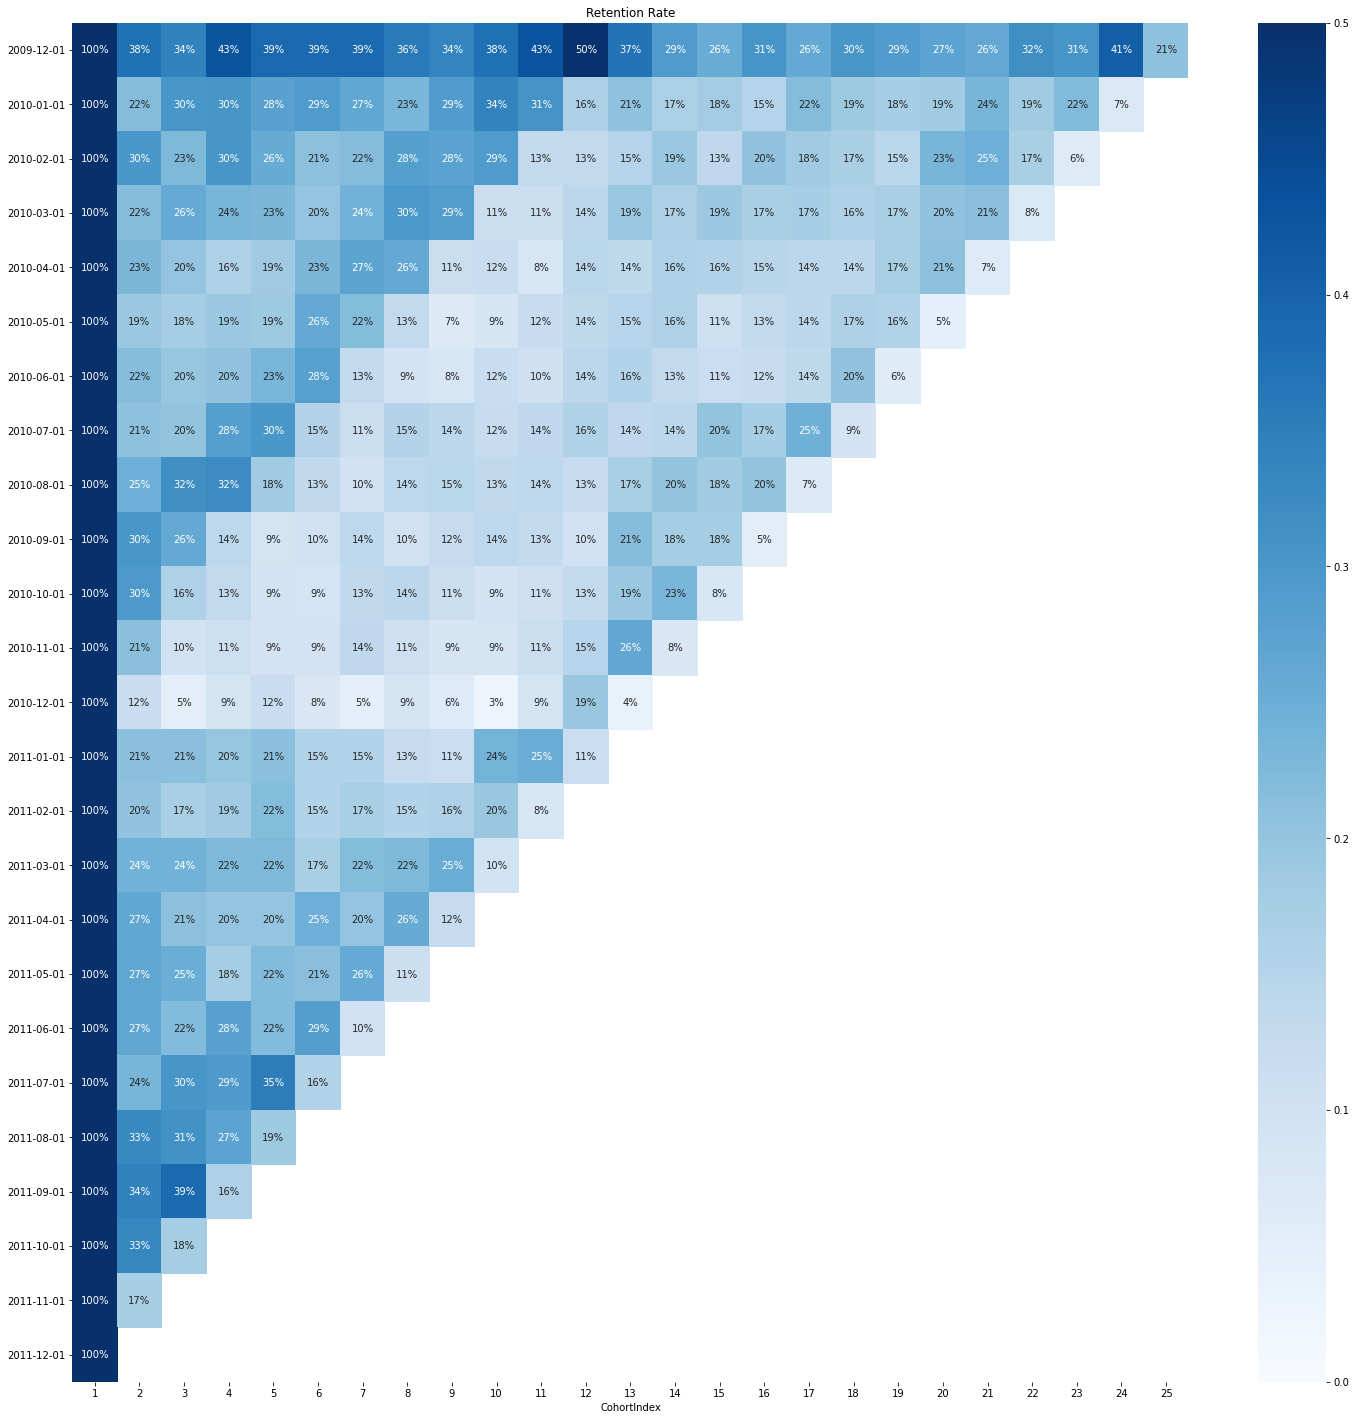

In [45]:
plt.figure(figsize=(25,25))
plt.title('Retention Rate')
sns.heatmap(retention,annot=True,fmt='.0%',vmin = 0.0,vmax = 0.5,cmap='Blues')